In [1]:
import numpy as np
import open3d as o3d


print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
0.18.0


In [41]:
num_frames = 15
num_points = 2000
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/test_mesh_0res_{num_points}_"
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/mesh_0res_{num_points}_"
#file_prefix = f"G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Frame_00res_{num_points}_"
file_prefix = f"G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/dancer_fr0res_{num_points}_"

file_extension = ".xyz"

max_distance_matrix = np.zeros((num_points, num_points))

for index in range(5, num_frames):
    print(index)
    all_points = []
    filename = f"{file_prefix}{index:03d}{file_extension}"
    with open(filename, 'r') as file:
        for line in file:
            points = list(map(float, line.split()))
            all_points.append(points)
        all_points = np.array(all_points)
        print(all_points[0])
        for i in range(num_points):
            #print("i: ", i)
            for j in range(i+1, num_points):
                if np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0)) > max_distance_matrix[i, j]:
                    max_distance_matrix[i, j] = np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0))
                
                max_distance_matrix[j, i] = max_distance_matrix[i, j]
    
    if (index == 9 or index == 14):
        np.savetxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/Dancer_distance_matrix_{index-4}_{num_points}.txt", max_distance_matrix)
print(all_points.__len__())


            
np.savetxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/Dancer_distance_matrix_{num_frames}_{num_points}.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/basketball_distance_matrix_{num_frames}_{num_points}_1519.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/collision_distance_matrix_{num_frames}_{num_points}_2630.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/dancer-output-max/dancer_{num_points}/dancer_distance_matrix_{num_frames}_{num_points}_0610.txt", max_distance_matrix)

print("Distance Matrix:")
print(max_distance_matrix)

5
[0.04419455 0.07680917 0.18498687]
6
[0.04448629 0.07288997 0.17887244]
7
[0.04748628 0.07257959 0.17067483]
8
[0.05302983 0.0764374  0.16661663]
9
[0.05874313 0.08225434 0.16675222]
10
[0.06279324 0.08822013 0.16724324]
11
[0.06499722 0.09316311 0.16757658]
12
[0.06487827 0.0961069  0.17067537]
13
[0.06270631 0.0934419  0.17809531]
14
[0.05952751 0.08655575 0.18768935]
2000
Distance Matrix:
[[0.         0.72459621 0.28659775 ... 0.59810365 0.69224121 1.10220904]
 [0.72459621 0.         0.44181697 ... 1.29096623 0.09484719 0.42138951]
 [0.28659775 0.44181697 0.         ... 0.88043727 0.41707589 0.82148032]
 ...
 [0.59810365 1.29096623 0.88043727 ... 0.         1.25985854 1.69312717]
 [0.69224121 0.09484719 0.41707589 ... 1.25985854 0.         0.43939405]
 [1.10220904 0.42138951 0.82148032 ... 1.69312717 0.43939405 0.        ]]


In [10]:
num_frames = 15
num_points = 2000

In [11]:
#Levi_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Levi_distance_matrix_5_{num_points}.txt")
Dancer_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/Dancer_distance_matrix_{num_frames}_{num_points}.txt")
#print(Levi_distance_matrix, Levi_distance_matrix.__len__())
print(Dancer_distance_matrix, Dancer_distance_matrix.__len__())

[[0.         0.72459621 0.28659775 ... 0.59810365 0.69224121 1.10220904]
 [0.72459621 0.         0.44181697 ... 1.29096623 0.09484719 0.42138951]
 [0.28659775 0.44181697 0.         ... 0.88043727 0.41707589 0.82148032]
 ...
 [0.59810365 1.29096623 0.88043727 ... 0.         1.25985854 1.69312717]
 [0.69224121 0.09484719 0.41707589 ... 1.25985854 0.         0.43939405]
 [1.10220904 0.42138951 0.82148032 ... 1.69312717 0.43939405 0.        ]] 2000


C:\Users\Windows\anaconda3\envs\open3d\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


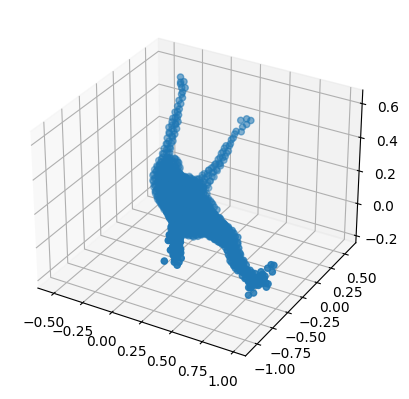

In [21]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

max_distance_matrix = Dancer_distance_matrix

mds = MDS(n_components=3, metric=True ,dissimilarity='precomputed', n_jobs=-1, eps= 1e-20, verbose=0, random_state=1, n_init = 6, max_iter = 300)
reference_centers = mds.fit_transform(max_distance_matrix)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers[:, 0], reference_centers[:, 1], reference_centers[:, 2])
plt.show()

[[ 0.04419455  0.07680917  0.18498687]
 [ 0.03280589  0.7987771   0.22256072]
 [ 0.0234607   0.3580561   0.2242611 ]
 ...
 [ 0.2500778  -0.46669626  0.09484395]
 [ 0.00153721  0.765104    0.13958855]
 [-0.19672745  1.1393145   0.219834  ]] 2000


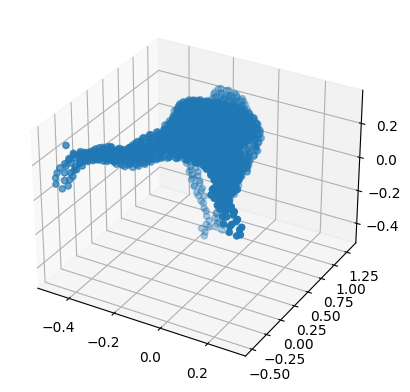

In [13]:
#center_filename_Levi = f'G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Frame_00res_{num_points}_{i:03d}.xyz'
#center_filename_Dancer = f'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/dancer_fr0res_{num_points}_{i:03d}.xyz'
center_datas = []
for i in range(5, 20):
    center_filename = f'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/dancer_fr0res_{num_points}_{i:03d}.xyz'
    center_data = np.loadtxt(center_filename)
    center_datas.append(center_data)

center = center_datas[0]
print(center, center.__len__())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(center[:, 0], center[:, 1], center[:, 2])
plt.show()

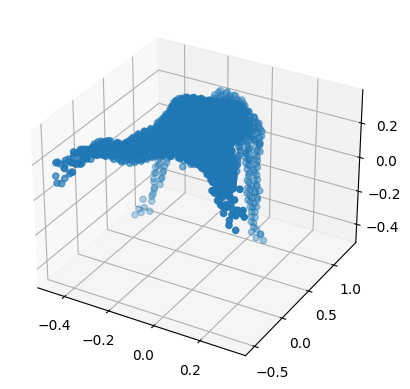

In [22]:
centers = center_datas[0]
reference_centers = reference_centers

centers_mean = np.mean(centers, axis=0)
reference_centers_mean = np.mean(reference_centers, axis=0)
centers_centered = centers - centers_mean
reference_centers_centered = reference_centers - reference_centers_mean

cov_matrix = np.dot(centers_centered.T, reference_centers_centered)

U, _, Vt = np.linalg.svd(cov_matrix)

R = np.dot(U, Vt)

reference_centers_aligned = np.dot(reference_centers_centered, R.T)

reference_centers_aligned = reference_centers_aligned + centers_mean

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers_aligned[:, 0], reference_centers_aligned[:, 1], reference_centers_aligned[:, 2])
plt.show()

In [25]:
center_datas[1]

array([[ 0.1185184 ,  1.2878482 ,  0.15007968],
       [ 0.02481447,  0.96018076, -0.11346257],
       [ 0.11127108,  0.5750971 , -0.14078346],
       ...,
       [-0.04567012,  0.997076  ,  0.01365212],
       [-0.00821909,  1.3953402 , -0.19307953],
       [ 0.02781775,  1.5748355 ,  0.17767778]])

In [24]:
reference_centers_aligned

array([[ 0.35182608,  1.59960453,  0.027775  ],
       [ 0.03558908,  0.9257926 , -0.10807943],
       [ 0.13925589,  0.54073091, -0.18670698],
       ...,
       [-0.11614585,  1.64055501, -0.25249613],
       [ 0.12458424,  0.62821848, -0.21172407],
       [ 0.05320971,  0.86322701, -0.13833412]])

In [7]:
def draw_centers(centers, radius, color):
    spheres = []
    sphere_radius = radius 
    
    for point in centers:
        mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=sphere_radius)
        mesh_sphere.compute_vertex_normals()
        
        mesh_sphere.translate(point)
        
        spheres.append(mesh_sphere)
    
    all_spheres = o3d.geometry.TriangleMesh()
    for sphere in spheres:
        all_spheres += sphere
    
    all_spheres.paint_uniform_color(color) 
    
    o3d.visualization.draw_geometries([all_spheres])

In [23]:
draw_centers(reference_centers_aligned, 0.01, [0.5,0.5,0.5])

In [25]:
#output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/reference_centers_aligned.xyz'
output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/reference_centers_aligned.xyz'
np.savetxt(output_filename, reference_centers_aligned, fmt='%f', delimiter=' ')


with open(output_filename, 'r') as file:
    lines = file.readlines()
    print("".join(lines[:5])) 

0.055526 0.078598 0.171532
0.022288 0.792588 0.236942
0.018028 0.357584 0.217594
0.030021 1.006488 0.127878
-0.072214 0.462698 0.142656

